<a href="https://colab.research.google.com/github/Ramjidixit/ML_lab/blob/main/Copy_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris=datasets.load_iris()

iris.target_names
iris.keys()
iris.data.shape
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
species=[]
for i in range(len(iris['target'])):
  if iris['target'][i]==0:
    species.append("setosa")
  elif iris['target'][i]==1:
      species.append("versicolor")
  else:
    species.append("virginica")

iris['species']=species
iris.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


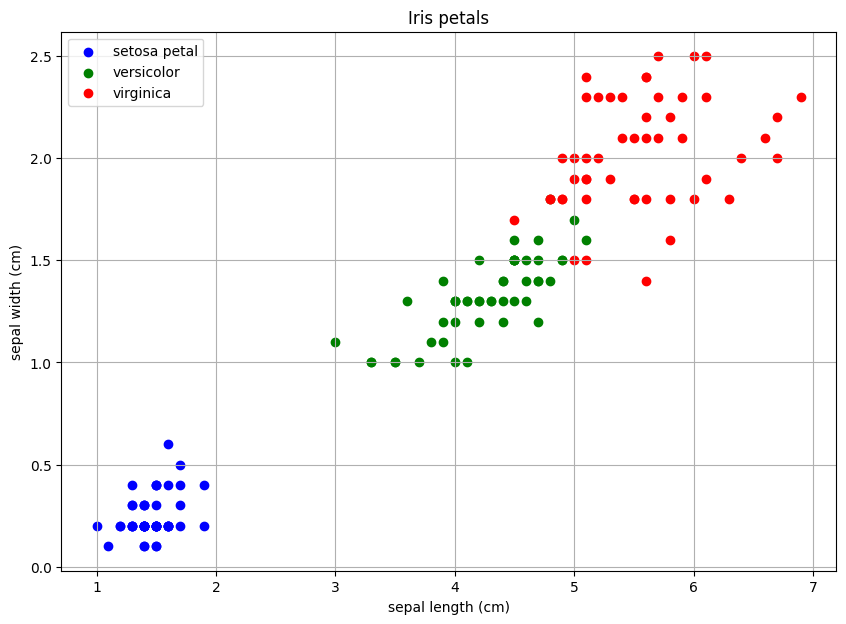

In [ ]:
import matplotlib.pyplot as plt
setosa=iris[iris.species=="setosa"]
versicolor=iris[iris.species=="versicolor"]
virginica=iris[iris.species=="virginica"]
fig,ax=plt.subplots()
fig.set_size_inches(10,7)
ax.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],label="setosa petal",facecolor="blue")
ax.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],label="versicolor",facecolor="green")
ax.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],label="virginica",facecolor="red")
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()


In [ ]:
from sklearn.model_selection import train_test_split
x=iris.drop(['sepal length (cm)','sepal width (cm)','target','species'],axis=1)
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=82)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels=['linear','rbf','poly']
for kernel in kernels:
  model=SVC(kernel=kernel)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  print("Accuracy using {}:".format(kernel),accuracy_score(pred,y_test))

Accuracy using linear: 0.9333333333333333
Accuracy using rbf: 0.9666666666666667
Accuracy using poly: 0.9333333333333333
